## Predição de séries temporais 

### Pipeline 

#### Carregamento dos dados 

In [144]:
import statsmodels.api as sm

# Carregar o dataset AirPassengers
data = sm.datasets.get_rdataset('AirPassengers', package='datasets')
df = data.data

#### Exploração dos dados (EDA)

##### Visualização inicial dos dados

In [145]:
df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


##### Resumo estatístico das variáveis numéricas

In [146]:
df.describe()

,time,value
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


##### Verificar a existência de valores nulos

Não existem valores nulos

In [147]:
df.isnull().sum()

time     0
value    0
dtype: int64

##### Verificar a distribuição dos dados

Analisando a distribuição, vemos que ela não se aproxima de uma distribuição gaussiana, ou seja, percebe-se que os dados tem uma alta variância.

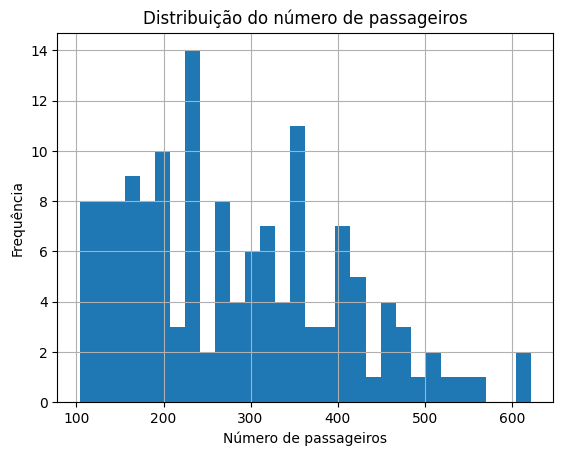

In [148]:
import matplotlib.pyplot as plt
import numpy as np

df['value'].hist(bins=30)
plt.title('Distribuição do número de passageiros')
plt.xlabel('Número de passageiros')
plt.ylabel('Frequência')
plt.show()

##### Aplicando a transformação logarítmica nos dados

Aplicamos a transformação logarítmica para tentar suavizar um pouco essa variância. Vemos agora que ela aparenta ter um comportamento mesmo que distante de uma gaussiana (distribuição normal).

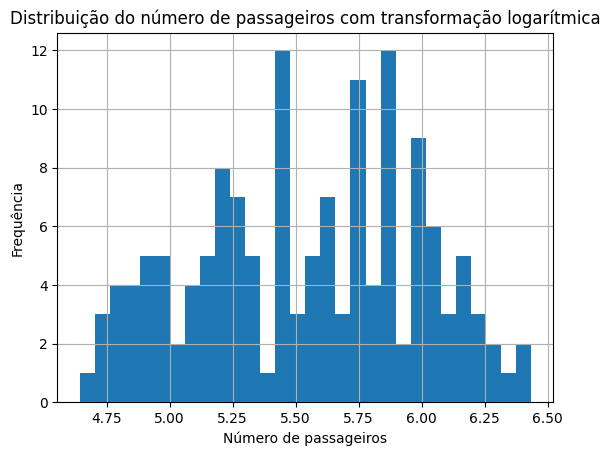

In [149]:
# Aplicando transformação logarítmica
df['log_value'] = np.log(df['value'])
df['log_value'].hist(bins=30)
plt.title('Distribuição do número de passageiros com transformação logarítmica')
plt.xlabel('Número de passageiros')
plt.ylabel('Frequência')
plt.show()

##### Visualizar a série temporal real

Analisando a série real podemos ver uma têndência positiva e uma sazonalidade que aparenta se repetir a cada ano

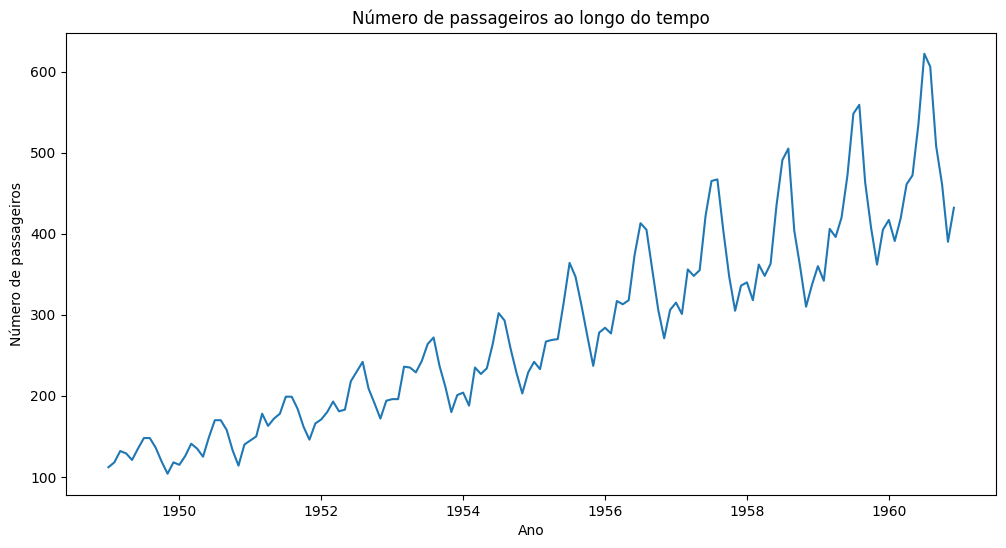

In [150]:
# 5. Visualizar a série temporal
df.set_index('time', inplace=True)  # Definir o 'Month' como índice
df['value'].plot(figsize=(12, 6))
plt.title('Número de passageiros ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Número de passageiros')
plt.show()

##### Visualizar a série temporal com transformação logaritimica

Após a transformação logaritmica, vemos a tendência está seguindo um comportamento mais linear

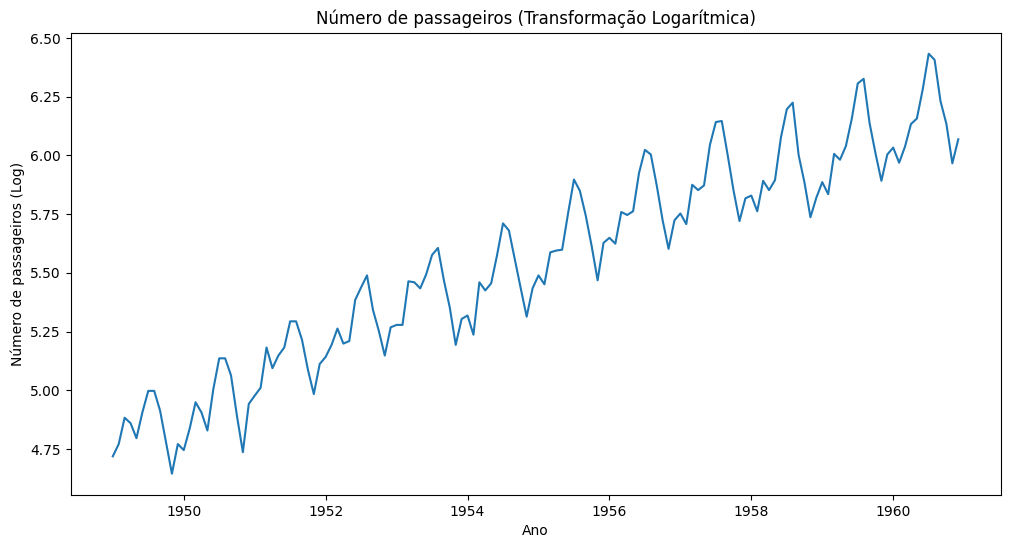

In [151]:
# Aplicando transformação logarítmica
df['log_value'] = np.log(df['value'])
df['log_value'].plot(figsize=(12, 6))
plt.title('Número de passageiros (Transformação Logarítmica)')
plt.xlabel('Ano')
plt.ylabel('Número de passageiros (Log)')
plt.show()

#### Decomposição da série (tendência, sazonalidade, ruído)

Aqui realizamos a decomposição da série para visualizarmos como cada componente se comporta

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df.reset_index('time', inplace=True)

df['year'] = df['time'].apply(lambda x: int(x))  # Parte inteira, ano
df['month'] = df['time'].apply(lambda x: round((x - int(x)) * 12 + 1))  # Parte decimal, mês

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

df.set_index('date', inplace=True)

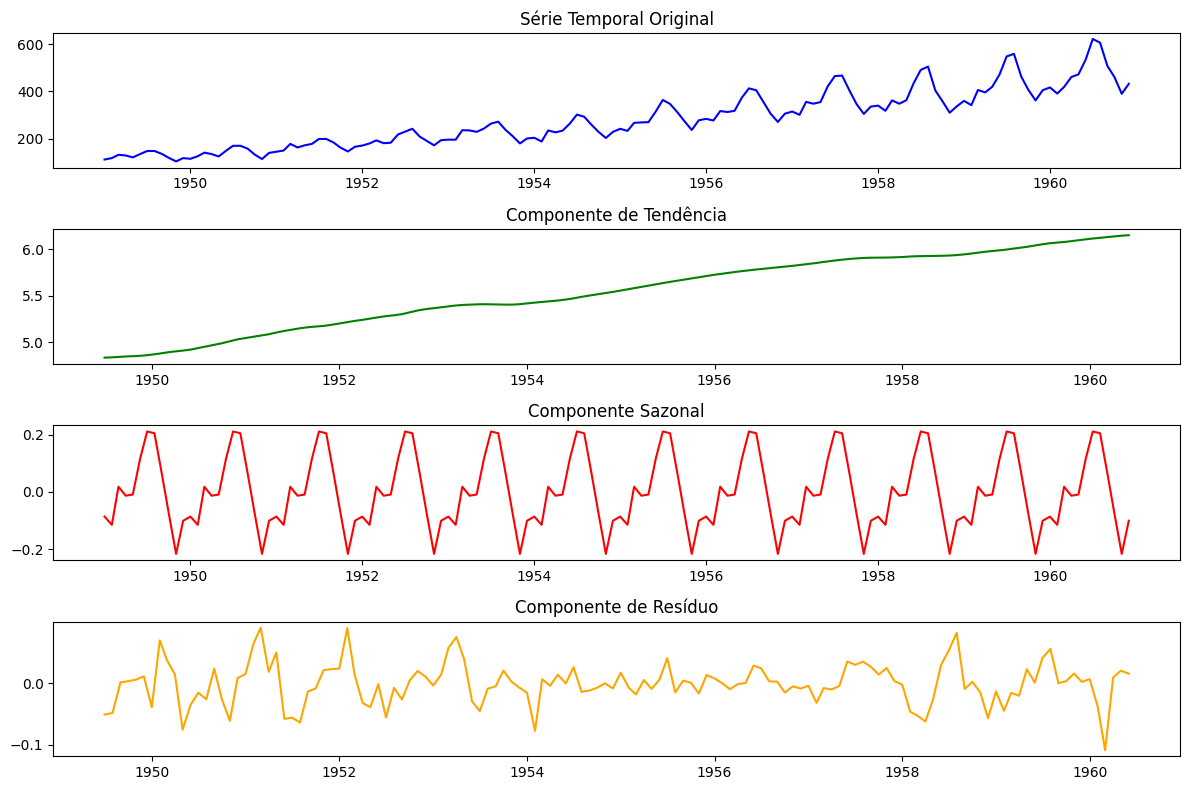

In [153]:
# Aplicando a decomposição da série temporal
decomposition = seasonal_decompose(df['log_value'], model='additive', period=12)

# Plotando os componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['value'], label='Original', color='blue')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendência', color='green')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Sazonalidade', color='red')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Resíduo', color='orange')
plt.title('Componente de Resíduo')

plt.tight_layout()
plt.show()

#### Teste de estacionaridade

##### Teste de estacionaridade ADF

O teste mostra que a série não é estacionária

In [154]:
from statsmodels.tsa.stattools import adfuller

def testADF(df):
    # Realizar o teste ADF na coluna de valores da série temporal
    result = adfuller(df)
    
    # Exibir os resultados do teste ADF
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    # Interpretar o p-value
    if result[1] <= 0.05:
        print("A série é estacionária (p-value <= 0.05).")
    else:
        print("A série não é estacionária (p-value > 0.05).")

In [155]:
testADF(df['log_value'])

ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
A série não é estacionária (p-value > 0.05).


##### Aplicando diferenciação para deixar a série estacionária e realizando o teste ADF novamente

In [169]:
#Corrigir problemas aqui
df['log_value_diff'] = df['log_value'] - df['log_value'].shift(1)

df.dropna(subset=['log_value_diff'], inplace=True)

testADF(df['log_value_diff'])

ADF Statistic: -3.008535080115329
p-value: 0.034104982532264114
Critical Values: {'1%': np.float64(-3.487517288664615), '5%': np.float64(-2.8865777180380032), '10%': np.float64(-2.5801239192052012)}
A série é estacionária (p-value <= 0.05).


#### Teste de modelos

#### Avaliação dos resultados

#### Conclusão